# **Engineering a Kerr-based Deterministic Cubic Phase Gate via Gaussian Operations in Strawberry Fields**

In [1]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### **Define Useful Functions**

In [2]:
def plot_wigner(state, title = "Wigner Function of State", range = 20):
    fig = plt.figure()
    x = np.linspace(-range, range, 100)
    p = np.linspace(-range, range, 100)
    Z = state.wigner(0, x, p)
    X, P = np.meshgrid(x, p)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, P, Z, cmap='RdYlGn', lw=0.5, rstride=1, cstride=1)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('P')
    fig.tight_layout()
    
    plt.show()
    
def ax_plot_wigner(ax, state, title, range=20):
    x = np.linspace(-range, range, 100)
    p = np.linspace(-range, range, 100)
    Z = state.wigner(0, x, p)
    X, P = np.meshgrid(x, p)
    ax.plot_surface(X, P, Z, cmap='RdYlGn', lw=0.5, rstride=1, cstride=1)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('P')
    
# plot  Wigner function on 2D surface
def plot_wigner_2d(state, title = "Wigner Function of State", range = 20):
    fig = plt.figure()
    x = np.linspace(-range, range, 100)
    p = np.linspace(-range, range, 100)
    Z = state.wigner(0, x, p)
    X, P = np.meshgrid(x, p)
    ax = fig.add_subplot(111)
    contour = ax.contourf(X, P, Z, cmap='RdYlGn')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('P')
    # add colorbar
    cbar = plt.colorbar(contour)
    cbar.set_label('Wigner Function')
    
    fig.tight_layout()
    
    plt.show()
    
def ax_plot_wigner_2d(ax, state, title, range = 20):
    x = np.linspace(-range, range, 100)
    p = np.linspace(-range, range, 100)
    Z = state.wigner(0, x, p)
    X, P = np.meshgrid(x, p)
    contour = ax.contourf(X, P, Z, cmap='RdYlGn')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('P')
    # add colorbar
    cbar = plt.colorbar(contour)
    cbar.set_label('Wigner Function')
    # set axis to have equal aspect ratio
    ax.set_aspect('equal')

### **Define Parameters**

In [ ]:
""" Hyperparameters """
N = 1000 # discretization order
cutoff_dim = 70 # Fock basis truncation

""" Cubic Phase Gate """
gamma = 0.7 # target gate angle


""" Squeezing """
lamdB = 15 # squeezing level in dB
lam = np.sqrt(10**(lamdB/10)) # squeezing parameter
rsq = -np.log(lam) # squeezing parameter in r form
sqphi  = 0 


""" Displacement """
# convert alpha to polar coordinates
alpha = 2 # displacement amplitude - how much we displace the state along x
rd = np.abs(alpha) # displacement amplitude in r form
phi = 0

""" Nonlinearity """
# medium
chi = 200 # nonlinearity strength

detuning = 3 * chi * alpha**2 - chi # detuning, based on appropriate choice for cubic phase gate
drive = -2 * chi * alpha**3 # drive, based on appropriate choice for cubic phase gate

# gate time
t = np.sqrt(2) * gamma / (chi * alpha * lam**3)
dt = t / N

# parameters for the cubic phase gate step
nkappa = chi/2.0 * dt # for Kerr gate
nkerrr = -chi/2 * dt # rotation for Kerr operator

nrphi = -detuning * dt # for second rotation

nr = drive * dt # magnitude of displacement in nonlinear step
ndphi = 3*np.pi / 2 # direction angle value for displacement in nonlinear step (want e^{î phi_{nd}} to be -i)

print("Squeezing parameter, r = ", rsq)

Squeezing parameter, r =  -1.7269388197455344


#### **Use Vacuum State**

Step  1  of  1000
Step  2  of  1000
Step  3  of  1000
Step  4  of  1000
Step  5  of  1000
Step  6  of  1000
Step  7  of  1000
Step  8  of  1000
Step  9  of  1000
Step  10  of  1000
Step  11  of  1000
Step  12  of  1000
Step  13  of  1000
Step  14  of  1000
Step  15  of  1000
Step  16  of  1000
Step  17  of  1000
Step  18  of  1000
Step  19  of  1000
Step  20  of  1000
Step  21  of  1000
Step  22  of  1000
Step  23  of  1000
Step  24  of  1000
Step  25  of  1000
Step  26  of  1000
Step  27  of  1000
Step  28  of  1000
Step  29  of  1000
Step  30  of  1000
Step  31  of  1000
Step  32  of  1000
Step  33  of  1000
Step  34  of  1000
Step  35  of  1000
Step  36  of  1000
Step  37  of  1000
Step  38  of  1000
Step  39  of  1000
Step  40  of  1000
Step  41  of  1000
Step  42  of  1000
Step  43  of  1000
Step  44  of  1000
Step  45  of  1000
Step  46  of  1000
Step  47  of  1000
Step  48  of  1000
Step  49  of  1000
Step  50  of  1000
Step  51  of  1000
Step  52  of  1000
Step  53  of  1000
St

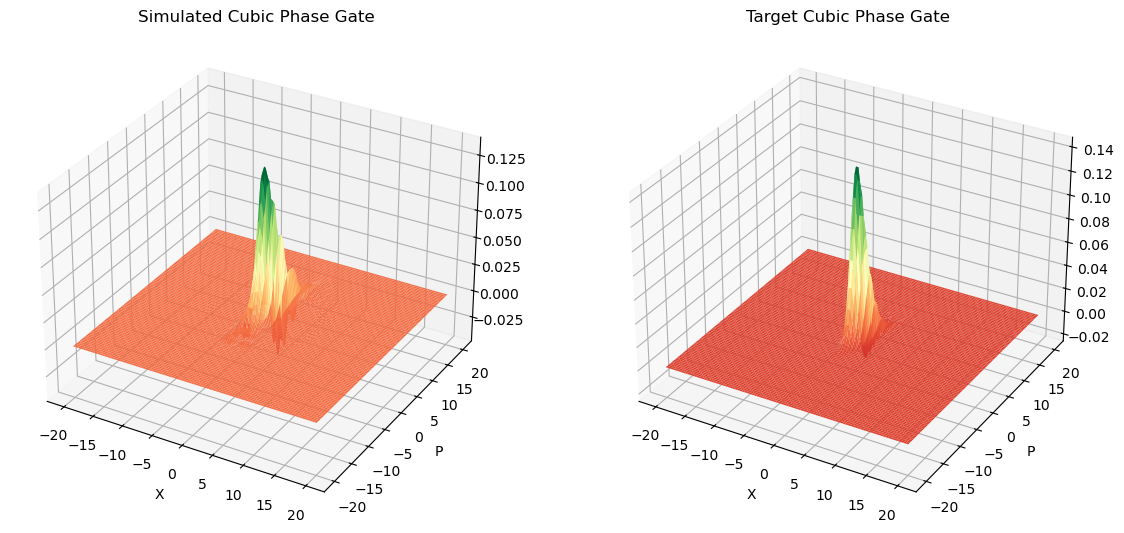

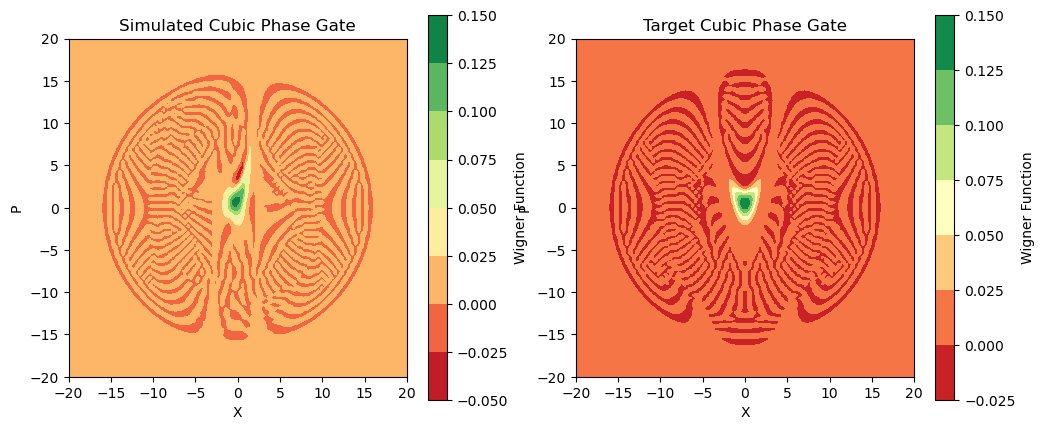

In [ ]:
prog = sf.Program(1)
with prog.context as q:
    Vac | q[0] # prepare the vacuum state |0>
    
    """ Direct """
    Sgate(rsq, sqphi) | q[0] # apply the squeezing
    Dgate(rd, phi) | q[0] # apply the displacement
    
    """ Nonlinearity """
    for i in range(N): # apply the small propagation step N times
        
        Rgate(-chi/2*dt) | q[0]
        Kgate(nkappa) | q[0]
        Rgate(nrphi) | q[0]
        Dgate(nr, ndphi) | q[0]
        print("Step ", i+1, " of ", N)
        
    
    """ Inverse """
    Dgate(-rd, phi) | q[0]
    Sgate(-rsq, sqphi) | q[0]
    
eng = sf.Engine('fock', backend_options={"cutoff_dim": cutoff_dim}) 
simstate = eng.run(prog).state


# determine actual cubic phase gate outcome
prog = sf.Program(1)
with prog.context as q:
    Vac | q[0] # prepare the vacuum state |0>
    Vgate(gamma) | q[0]
eng = sf.Engine('fock', backend_options={"cutoff_dim": cutoff_dim})
target_state = eng.run(prog).state


# plot the Wigner function of the simulated and target states
fig = plt.figure(figsize = (14, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax_plot_wigner(ax1, simstate, "Simulated Cubic Phase Gate")
ax_plot_wigner(ax2, target_state, "Target Cubic Phase Gate")
plt.show()

# plot 2d Wigner function
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax_plot_wigner_2d(ax1, simstate, "Simulated Cubic Phase Gate")
ax_plot_wigner_2d(ax2, target_state, "Target Cubic Phase Gate")
plt.show()



In [ ]:
fidelity = target_state.fidelity(other_state = simstate.ket(), mode=0)
print("Fidelity between the target and simulated states: ", fidelity)


Fidelity between the target and simulated states:  tf.Tensor(32302350.0, shape=(), dtype=float32)
